<a href="https://colab.research.google.com/github/dorianheld/Data-Science-Portfolio/blob/main/Elective_Project_Boston_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ADSP MIT/Colab Notebooks/Elective Project/Boston.csv').copy()
#Check the data has loaded in properly
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


## Data Overview

- Observations
- Sanity checks

In [ ]:
#Basic observations of the data
print(df.shape)
df.info()

(506, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [ ]:
#Check for any missing or duplicated rows
print(df.duplicated().sum())
print(df.isnull().sum())

0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
#Look at statistical summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

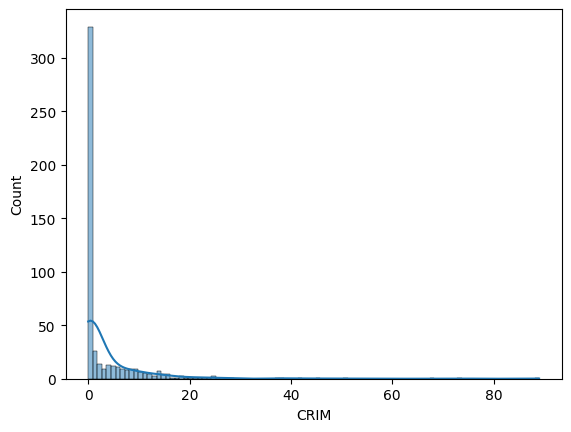

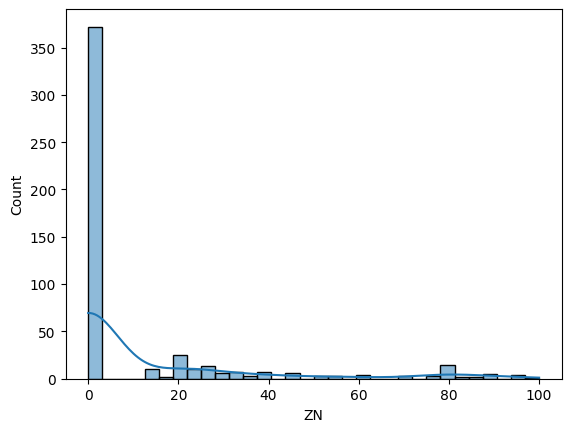

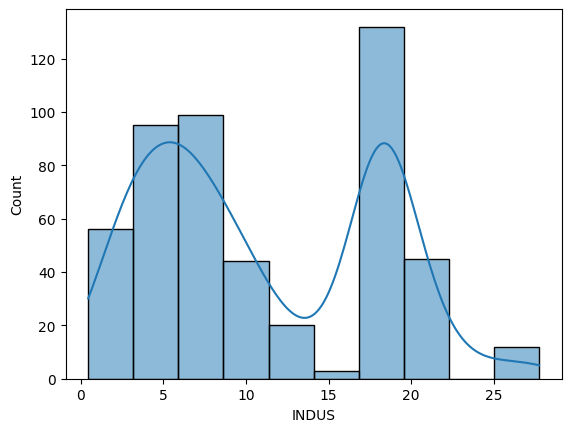

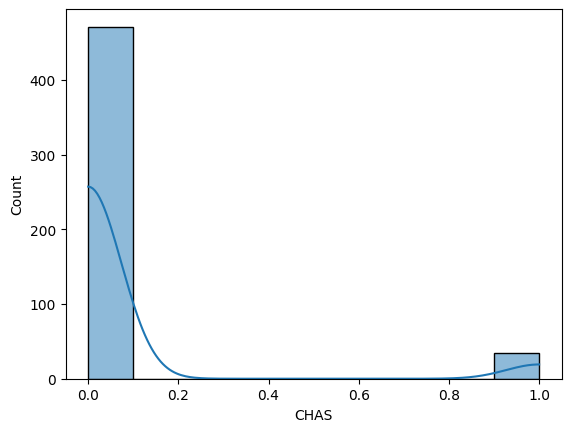

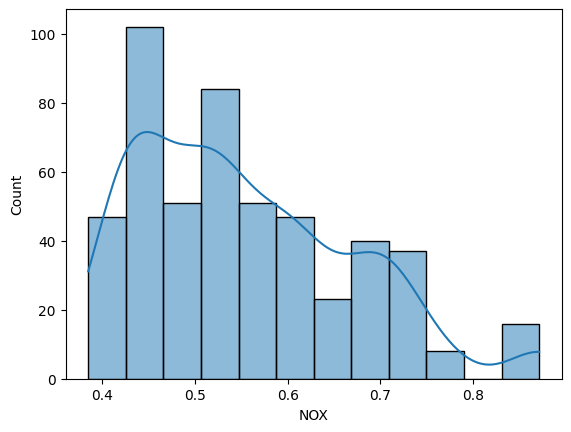

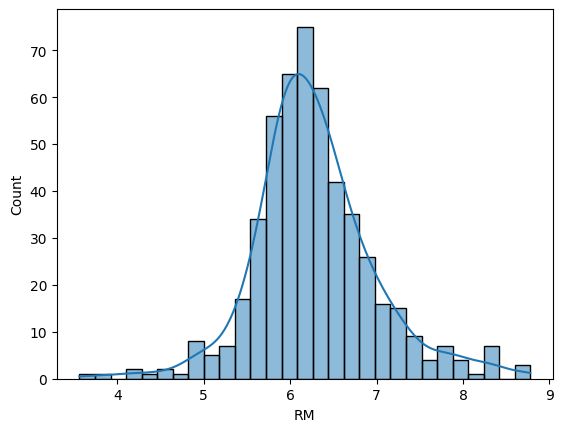

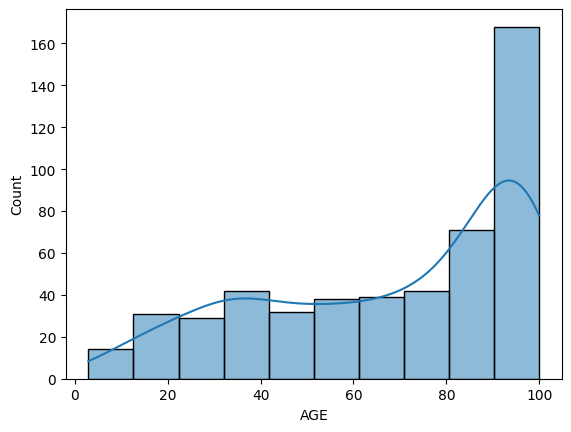

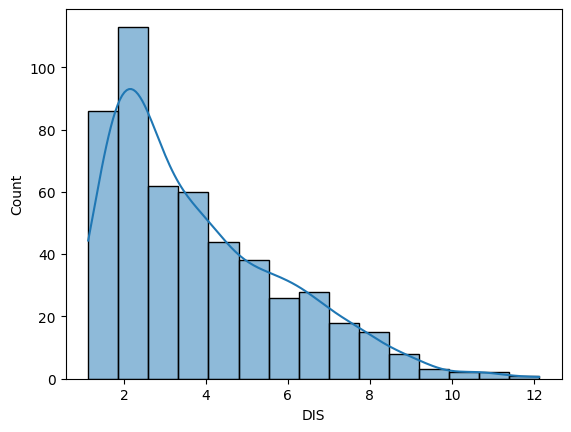

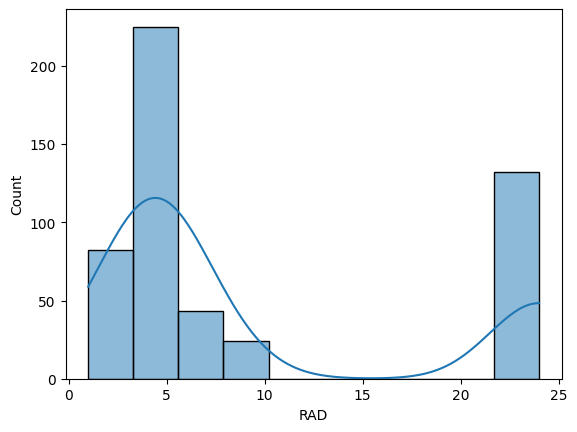

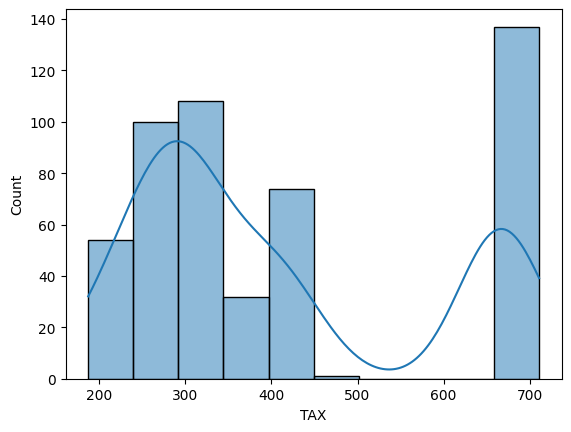

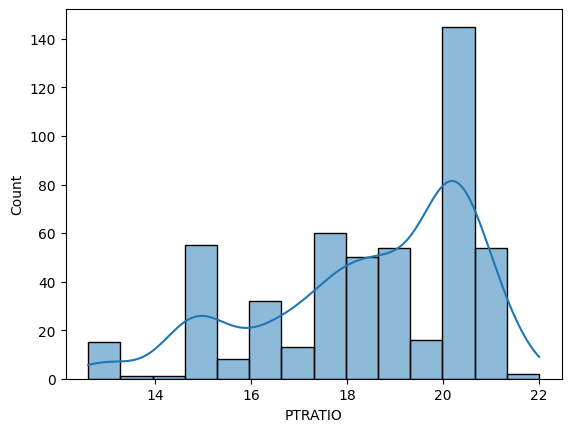

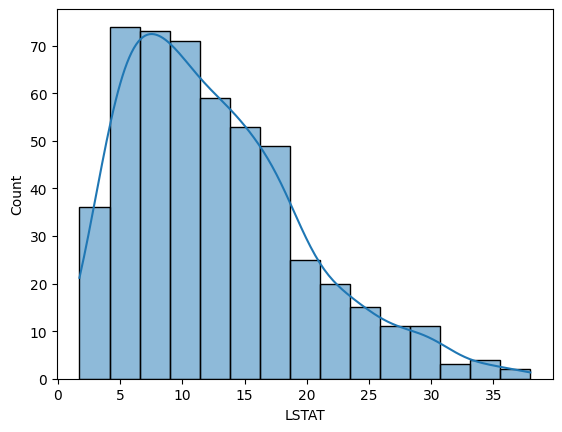

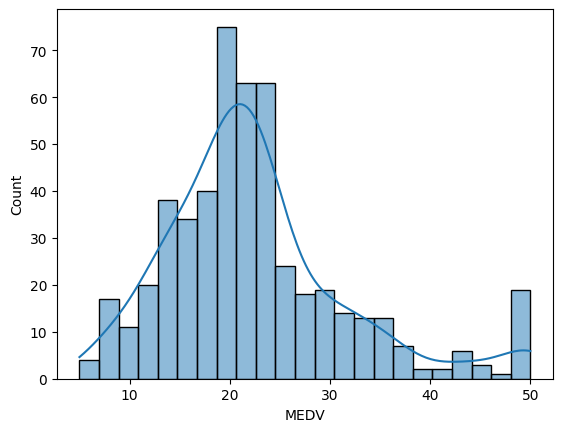

In [ ]:
#Plot histograms
for i in df.columns:
  sns.histplot(df[i],kde=True)
  plt.show()

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
#Missing value treatment. Check for missing values
if df.isnull().sum().sum()==0:
  print('No missing values!')

No missing values!


<Axes: xlabel='MEDV', ylabel='Count'>

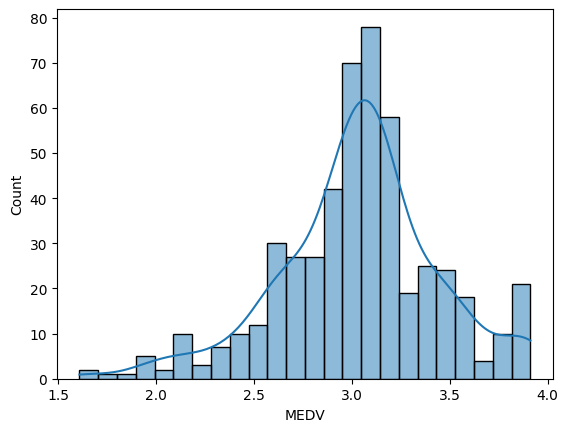

In [ ]:
#Note that our dependent variable, MEDV, is right skewed! Proceed with a trasformation and check whether we then get a normal distribution
medlog=np.log(df.MEDV)
sns.histplot(medlog,kde=True)

In [ ]:
#None of the features seem out of place or redundant at this stage, and the data collected is coherent, so no need for feature engineering here
#No outrageous outliers from the graphs

#Bivariate Analysis

<Axes: >

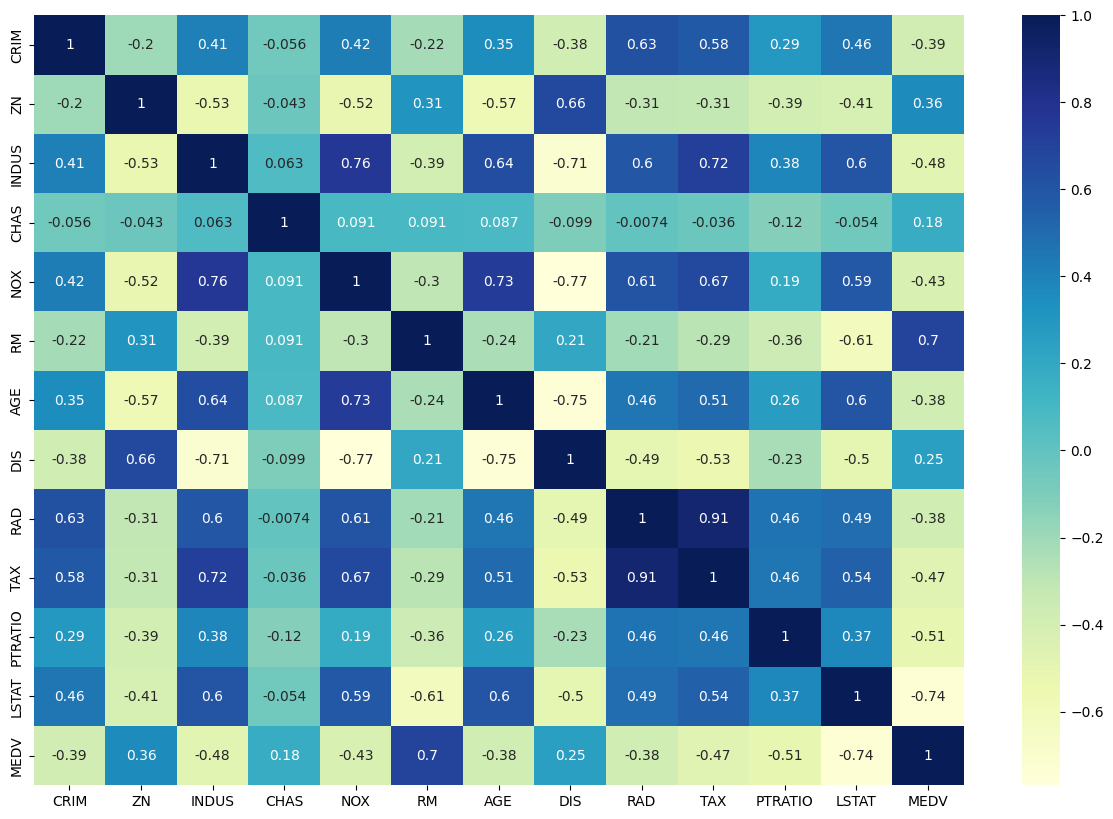

In [ ]:
cols=df.columns.tolist()
plt.figure(figsize=(15,10))
sns.heatmap(df[cols].corr(),annot=True,cmap='YlGnBu')

**Observations:**

Strong correlations appear between:
- INDUS & NOX,DIS,TAX
- NOX & AGE,DIS
- RM & MEDV
- AGE & DIS
- RAD & TAX (strongest)
- LSTAT & MEDV

CHAS has nearly no correlation with anything
PTRATIO not much correlation, except with TAX and MEDV

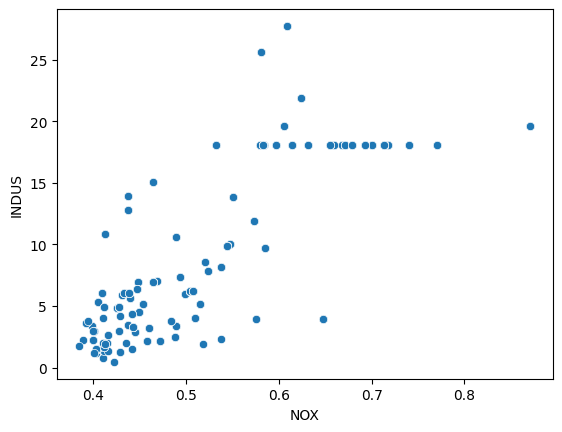

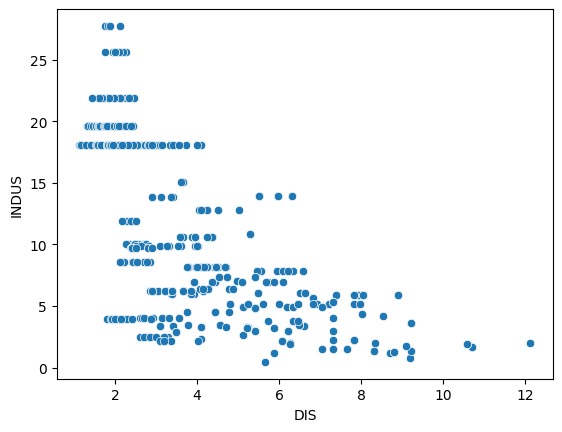

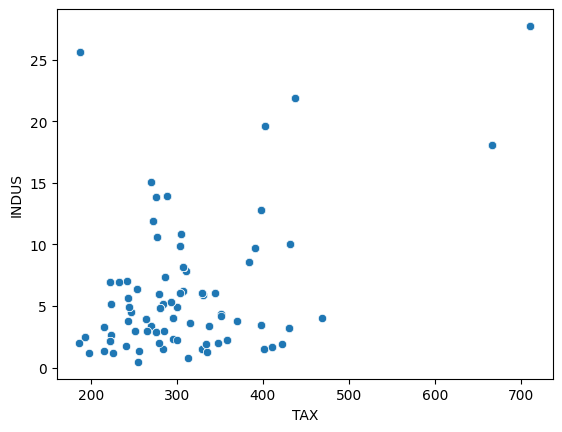

In [ ]:
#Look at the pairs listed above in more detail
for i in ['NOX','DIS','TAX']:
  sns.scatterplot(y=df.INDUS,x=df[i])
  plt.show()

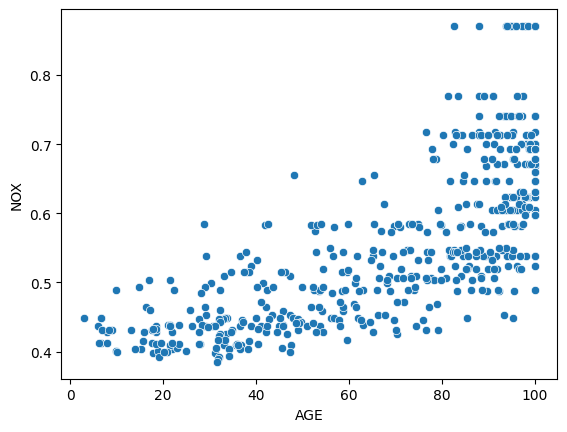

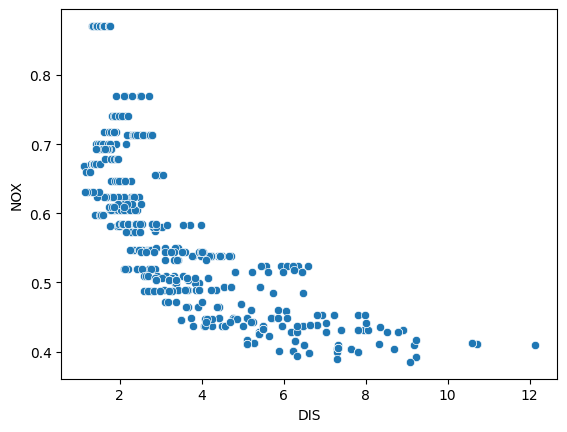

In [ ]:
for i in ['AGE','DIS']:
  sns.scatterplot(y=df.NOX,x=df[i])
  plt.show()

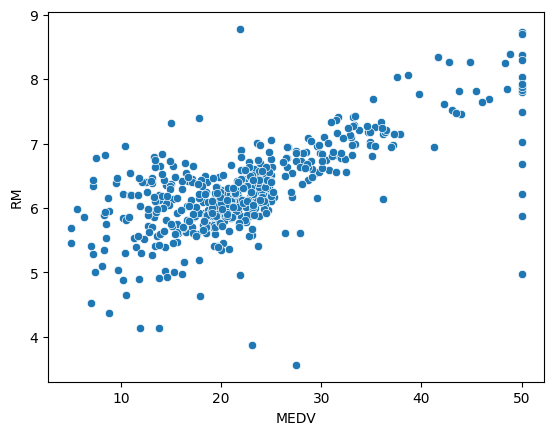

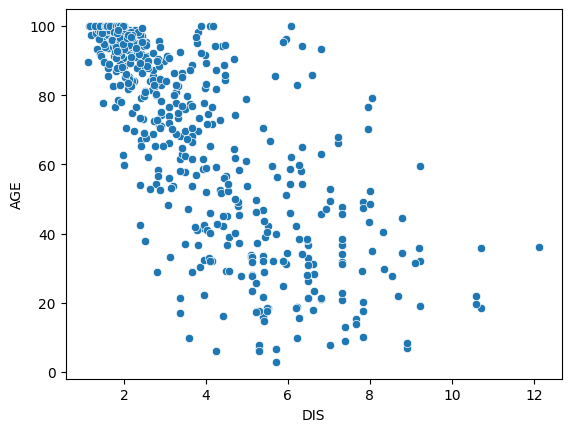

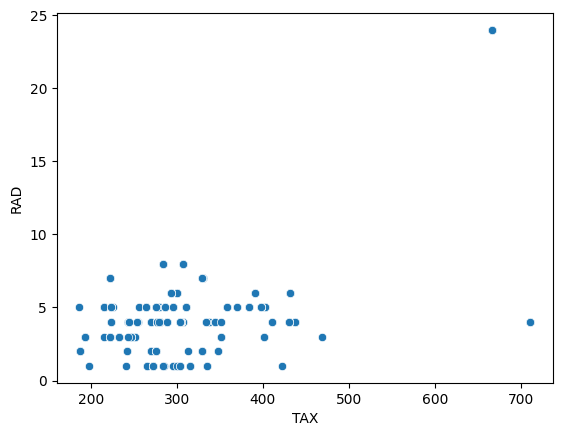

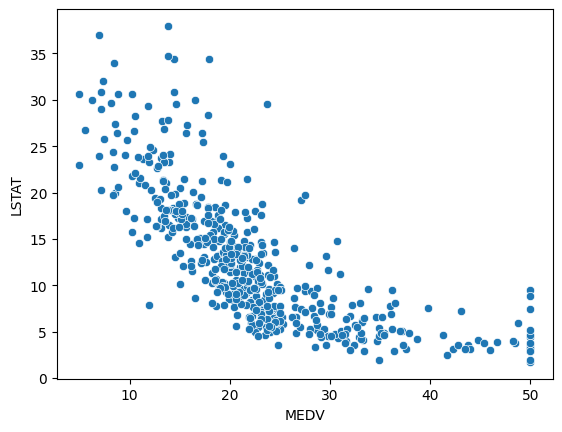

In [ ]:
sns.scatterplot(y=df.RM,x=df.MEDV)
plt.show()
sns.scatterplot(y=df.AGE,x=df.DIS)
plt.show()
sns.scatterplot(y=df.RAD,x=df.TAX)
plt.show()
sns.scatterplot(y=df.LSTAT,x=df.MEDV)
plt.show()

# Model Building - Linear Regression

In [ ]:
#Linear regression model libraries
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Library to split data
from sklearn.model_selection import train_test_split

**Steps to follow**
- Split dependent and independent variables
- Split data in test and train sets
- Build OLS model
  - Standardise numerical features
  - Test assumptions of model & perform feature selection if needed
- Test model

In [ ]:
# Split dependent and independent variables
# Independent variables
X = df.drop(['MEDV'],axis=1)
# Dependent variable
y = medlog

In [ ]:
# Split data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [ ]:
# Scale variables
X_train_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X_train),index=X_train.index,columns=X_train.columns)

In [ ]:
# Build OLS model
# Add intercept term in regression
X_train_scaled=sm.add_constant(X_train_scaled)
# Create model
model1=sm.OLS(y_train, X_train_scaled).fit()

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

In [ ]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     97.19
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          3.27e-102
Time:                        18:32:36   Log-Likelihood:                 80.575
No. Observations:                 354   AIC:                            -135.1
Df Residuals:                     341   BIC:                            -84.85
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7435      0.099     37.969      0.0

**Observations**
- We see an R^2 value of 0.774 which is pretty decent
- The 'INDUS' and 'AGE' features have p-values above 0.05, meaning we have reasonable evidence to fail to reject the null hypothesis. Before we move on to checking the 4 linear regression assumptions, let's check the model for multicollinearity by evaluating the features' VIF scores. We will perform iterative feature selection through this.

In [ ]:
# Create function that returns a dataframe with VIF scores
def vif(X_train_scaled):
  vif_scores = pd.Series([variance_inflation_factor(X_train_scaled.values, i) for i in range(len(X_train_scaled.columns))], index=X_train_scaled.columns,dtype=float)
  print('VIF scores')
  print(vif_scores)

In [ ]:
vif(X_train_scaled)

VIF scores
const      89.257836
CRIM        1.924114
ZN          2.743574
INDUS       3.999538
CHAS        1.076564
NOX         4.396157
RM          1.860950
AGE         3.150170
DIS         4.355469
RAD         8.345247
TAX        10.191941
PTRATIO     1.943409
LSTAT       2.861881
dtype: float64


**Observations**
- Two fetaures have high VIF scores. These are 'RAD' and 'TAX'
- Since TAX's VIF score is higher, let's remove it from our training data and check the data's collinearity again

In [ ]:
# Collinearity v2
# Remove 'TAX' feature
X_train_scaled2=X_train_scaled.drop('TAX',axis=1)
# Check collinearity
vif(X_train_scaled2)

VIF scores
const      89.256101
CRIM        1.923159
ZN          2.483399
INDUS       3.270983
CHAS        1.050708
NOX         4.361847
RM          1.857918
AGE         3.149005
DIS         4.333734
RAD         2.942862
PTRATIO     1.909750
LSTAT       2.860251
dtype: float64


**Observations**
- The high collinearity of RAD is gone! We can now update our model on this new training data

In [ ]:
# Linear regression model v2
model2=sm.OLS(y_train, X_train_scaled2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          1.40e-101
Time:                        18:32:54   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7447      0.100     37.612      0.0

**Observations**
- VIF scores for the features are all now acceptable
- ZN, INDUS, and AGE all have p-values above 0.05. This means that for these features we fail to reject the null hypothesis, and as such the features are deemed insignificant in our model. Therefore, we can go ahead and remove them, then update our model

In [ ]:
# Linear regression model v3
X_train_scaled3=X_train_scaled2.drop(['ZN','INDUS','AGE'],axis=1)
model3=sm.OLS(y_train, X_train_scaled3).fit()
print(model3.summary())
print('-'*100)
print(vif(X_train_scaled3))

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          2.61e-104
Time:                        18:33:20   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7487      0.096     39.211      0.0

**Observations**
- We now see that every feature is significant to our model (p-value<=0.05) and all VIF scores are sufficiently low (<5.0)
- model 3 is therefore our final model. We can ahead and make that clear in our saved variables

In [ ]:
# model3 is our final model
ols_model=model3

### Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied. These assumptions are:
  - **Constant zero mean of residuals**
  - **No heteroscedasticity**
  - **Linearity of variables**
  - **Residuals are normally distributed**

In [ ]:
# Constant zero mean of residuals
res=ols_model.resid
print(res.mean())

4.193130463061679e-15


In [ ]:
# No heteroscedasticity
# Proceed with Goldfeld-Quandt hypothesis test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

s = ["F stat", "p-value"]
t = sms.het_goldfeldquandt(y_train, X_train_scaled3)
lzip(s, t)

[('F stat', 1.0835082923425288), ('p-value', 0.30190120067668275)]

<Axes: >

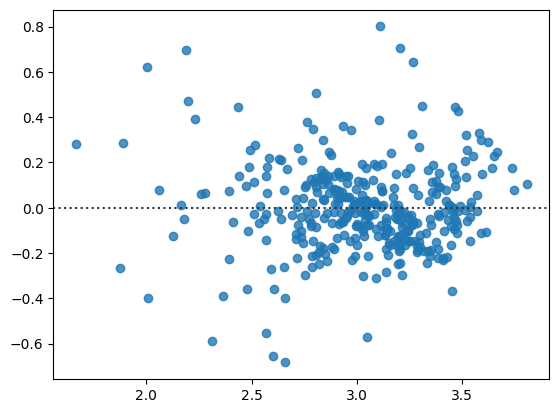

In [ ]:
# Linearity of Variables
f=ols_model.fittedvalues
sns.residplot(x=f,y=res)

The skew of the residuals is 0.40987469081129696 with median -0.018686816844734944 and mean 4.193130463061679e-15


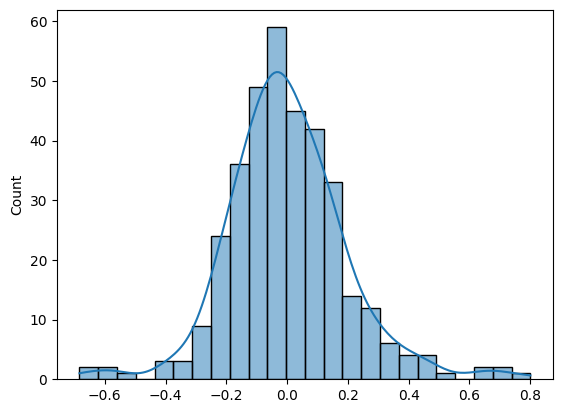

In [ ]:
# Normality of error terms
sns.histplot(res,kde=True)
print('The skew of the residuals is',res.skew(),'with median',res.median(),'and mean',res.mean())
plt.show()

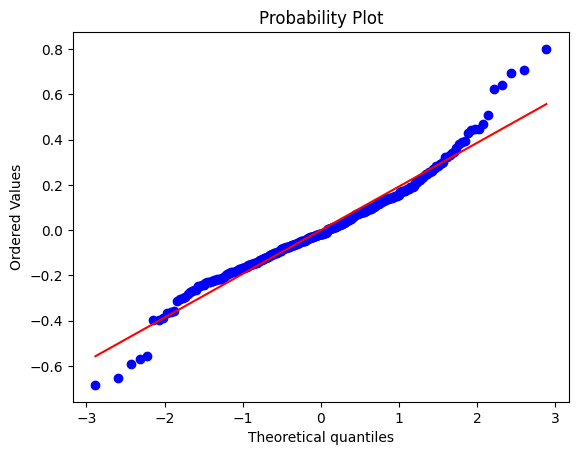

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(res, plot = pylab)
plt.show()

In [ ]:
print(ols_model.rsquared)
print(ols_model.mse_resid)
print(np.sqrt(ols_model.mse_resid))

0.7671737057912822
0.0392187883349037
0.19803734075901872


### Performance metrics
Metrics used:
- **MSE**
- **RMSE**
- **MAE**
- **MAPE**

In [ ]:
# Prediction on training data
y_pred_train = ols_model.predict(X_train_scaled3)

# Prediction on test data
X_test_scaled=sm.add_constant(pd.DataFrame(MinMaxScaler().fit_transform(X_test),index=X_test.index,columns=X_test.columns)).drop(['TAX','ZN','INDUS','AGE'],axis=1)
y_pred_test = ols_model.predict(X_test_scaled)

In [ ]:
# MSE
mse_train=((y_pred_train-y_train)**2).mean()
mse_test=((y_pred_test-y_test)**2).mean()
# RMSE
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
# MAE
mae_train=(np.abs(y_pred_train-y_train)).mean()
mae_test=(np.abs(y_pred_test-y_test)).mean()
# MAPE
mape_train=((np.abs(y_pred_train-y_train))*100/y_train).mean()
mape_test=((np.abs(y_pred_test-y_test))*100/y_test).mean()

In [ ]:
met=[mse_train,mse_test,rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test]
metname=['mse_train','mse_test','rmse_train','rmse_test','mae_train','mae_test','mape_train','mape_test']

In [ ]:
for i,j in zip(met,metname):
  print(j,': ',i,sep='')

mse_train: 0.03822170049588073
mse_test: 0.04033136829216085
rmse_train: 0.19550370967293876
rmse_test: 0.200826712098169
mae_train: 0.14368596074360607
mae_test: 0.15573407255418578
mape_train: 4.981812504754256
mape_test: 5.237965780561446


**Observations**
- V GUCCI WAHOO
- mape_test is above 5% => issue?

### Cross-Validation

In [ ]:
### Cross validate with Linear Regression model to get C-V scores
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lreg=LinearRegression()
cv1 = cross_val_score(lreg, X_train, y_train, cv = 10)
cv2 = cross_val_score(lreg, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')

print('R^2 value:',round(cv1.mean(),3),'+/-',round(cv1.std()*2,3))
print('MSE:',round(-cv2.mean(),3),'+/-',round(cv2.std()*2,3))

R^2 value: 0.733 +/- 0.232
MSE: 0.041 +/- 0.023


**Observations**
- R^2 value is very similar to the R^2 value of our OLS model of 0.767, although the standard deviation in the cross-validation is very large
- MSE value is likewise similar to the MSE value of the model
- This points to our model being well fit to our training data. We will check below how it fairs on test data


## Final Model

In [ ]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          2.61e-104
Time:                        20:02:15   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7487      0.096     39.211      0.0

In [ ]:
pd.DataFrame({'Independent Feature':ols_model.params.index,'Coefficient':ols_model.params.values})

,Independent Feature,Coefficient
0,const,3.748700
1,CRIM,-0.919131
2,CHAS,0.119773
3,NOX,-0.513326
4,RM,0.307433
5,DIS,-0.484621
6,RAD,0.180515
7,PTRATIO,-0.455934
8,LSTAT,-1.061000


**Equation of Model**

log(**MEDV**) =  3.7487 + (-0.9191)**CRIM** + (0.1198)**CHAS** + (-0.5133)**NOX** + (0.3074)**RM** + (-0.4846)**DIS** + (0.1805)**RAD** + (-0.4559)**PTRATIO** + (-1.061)**LSTAT**

## Actionable Insights and Recommendations

**Observations and insights**
- The most important variables that influence the median value of owner-occupied homes are the percentage of the suburb's/town's population that is of 'lower status' and the town's per-capita crime rate.
  - Both these features have incredibly strong negative correlations with median house prices
  - This is what we would expect. Houses that are found in areas with high crime rates will inevitably have lower demand and this will mark down prices. Similarly, areas where a significant proportion of the population are below average in income would see lower house prices to accommodate residents' means
- The least influential variables that still have a statistically significant effect on the median value of owner-occupied homes are the Charles River dummy variable and the index of accessibility to radial highways
  - If we assume a rudimentary model of price vs demand, we can infer here that an area's proximity to the river or its accessibility to radial highways have little impact on Bostonian residents' interest in living there compared to the average for the Boston housing market
- It is important to note that 3 features were removed from the final model for failing to have a significant effect on the dependent variable. These are:
  - The proportion of residential land zoned for lots over 25,000 sq.ft.
  - The proportion of non-retail business acres per town
  - The proportion of owner-occupied units built before 1940
- 1 feature was removed for having too strong collinearity with other features, This is:
  - The full-value property-tax rate per 10,000 dollars
    - This feature was most strongly correlated with the weighted distances to five Boston employment centres and the proportion of non-retail business acres per town

**Business Recommendations**

We are fortunate that two features have an incredibly strong negative correlation with median house values. This means that the company can comfortably rely on these statistics when predicting owner-occupied homes' values.

This also allows flexiblity in the company's business strategy, as we have identified features that carry little to no significance when predicting owner-occupied homes' values. This can help the company focus on more significant features or follow the market average with more security

Additionally, the model proposed above has shown to be a very good fit for both the training and testing dataset. This increases our confidence that this model is a good predictor for poperty values.

However, the model fails to address features that weren't included in the initial dataset, which can result in incorrect predictions, especially for a location as vastly populated and busy as Boston. In addition, we only ran our model through one set of training and test data, and only cross-validated against one other model. Even though our model has shown to be a very good fit for the problem statement, we cannot say this with high certainty without developping it further.

___